# **Full Segmentation Analysis**
--------------------------------
Incorporates all data

In [1]:
from EDA_snippets import *  # custom script with a few convenience functions
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use("dark_background")

In [2]:
# load in all core data
transactions = pd.read_csv("data/twm_transactions.csv", delimiter=";")
accounts = pd.read_csv("data/twm_accounts.csv", delimiter=";")
customers = pd.read_csv("data/twm_customer.csv", delimiter=";")

## EDA

### Overview

In [3]:
transactions.head()

,tran_id,acct_nbr,tran_amt,principal_amt,interest_amt,new_balance,tran_date,tran_time,channel,tran_code
0,27,13625623,0.00,0.00,0.0,3753.34,21.10.1995,121656,A,IQ
1,97,13628392,0.00,0.00,0.0,254.49,5.2.1995,153053,V,IQ
2,21,13630842,-97.57,-97.57,0.0,3819.56,23.7.1995,0,P,WD
3,44,13631412,-0.15,-0.15,0.0,224.05,30.1.1995,0,,FK
4,31,13625722,0.00,0.00,0.0,240.55,25.1.1995,204521,B,IQ


In [4]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77580 entries, 0 to 77579
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tran_id        77580 non-null  int64  
 1   acct_nbr       77580 non-null  int64  
 2   tran_amt       77580 non-null  float64
 3   principal_amt  77580 non-null  float64
 4   interest_amt   77580 non-null  float64
 5   new_balance    77580 non-null  float64
 6   tran_date      77580 non-null  object 
 7   tran_time      77580 non-null  int64  
 8   channel        77580 non-null  object 
 9   tran_code      77580 non-null  object 
dtypes: float64(4), int64(3), object(3)
memory usage: 5.9+ MB


In [5]:
accounts.head()

,acct_nbr,cust_id,acct_type,account_active,acct_start_date,acct_end_date,starting_balance,ending_balance
0,13628063,1362806,SV,Y,10.12.1995,NaN,1430.22,284.58
1,4561143213627090,1362709,CC,Y,15.3.1993,NaN,266.34,496.15
2,4561143213628360,1362836,CC,Y,18.3.1992,NaN,55.90,1000.00
3,13633112,1363311,CK,Y,6.7.1995,NaN,11017.13,968.46
4,4561143213633610,1363361,CC,Y,17.6.1994,NaN,849.37,462.28


In [6]:
accounts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1409 entries, 0 to 1408
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   acct_nbr          1409 non-null   int64  
 1   cust_id           1409 non-null   int64  
 2   acct_type         1409 non-null   object 
 3   account_active    1409 non-null   object 
 4   acct_start_date   1409 non-null   object 
 5   acct_end_date     143 non-null    object 
 6   starting_balance  1409 non-null   float64
 7   ending_balance    1409 non-null   float64
dtypes: float64(2), int64(2), object(4)
memory usage: 88.2+ KB


In [7]:
print(
    f"A total of {accounts.cust_id.nunique()} customers hold {accounts.acct_nbr.nunique()} accounts.\nOn average, each customer has {accounts.acct_nbr.nunique()//accounts.cust_id.nunique()} accounts."
)

A total of 665 customers hold 1409 accounts.
On average, each customer has 2 accounts.


### Table joining

In [8]:
data = transactions.merge(accounts, "outer", on="acct_nbr")

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77592 entries, 0 to 77591
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   tran_id           77580 non-null  float64
 1   acct_nbr          77592 non-null  int64  
 2   tran_amt          77580 non-null  float64
 3   principal_amt     77580 non-null  float64
 4   interest_amt      77580 non-null  float64
 5   new_balance       77580 non-null  float64
 6   tran_date         77580 non-null  object 
 7   tran_time         77580 non-null  float64
 8   channel           77580 non-null  object 
 9   tran_code         77580 non-null  object 
 10  cust_id           77572 non-null  float64
 11  acct_type         77572 non-null  object 
 12  account_active    77572 non-null  object 
 13  acct_start_date   77572 non-null  object 
 14  acct_end_date     6856 non-null   object 
 15  starting_balance  77572 non-null  float64
 16  ending_balance    77572 non-null  float6

In [10]:
data = data.merge(customers, "outer", on="cust_id")

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77674 entries, 0 to 77673
Data columns (total 31 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   tran_id           77580 non-null  float64
 1   acct_nbr          77592 non-null  float64
 2   tran_amt          77580 non-null  float64
 3   principal_amt     77580 non-null  float64
 4   interest_amt      77580 non-null  float64
 5   new_balance       77580 non-null  float64
 6   tran_date         77580 non-null  object 
 7   tran_time         77580 non-null  float64
 8   channel           77580 non-null  object 
 9   tran_code         77580 non-null  object 
 10  cust_id           77654 non-null  float64
 11  acct_type         77572 non-null  object 
 12  account_active    77572 non-null  object 
 13  acct_start_date   77572 non-null  object 
 14  acct_end_date     6856 non-null   object 
 15  starting_balance  77572 non-null  float64
 16  ending_balance    77572 non-null  float6

### Null filtering

In [12]:
(100 * data.isnull().sum() / len(data)).sort_values(ascending=False)

acct_end_date       91.173366
starting_balance     0.131318
ending_balance       0.131318
acct_start_date      0.131318
account_active       0.131318
acct_type            0.131318
channel              0.121019
tran_code            0.121019
tran_id              0.121019
tran_time            0.121019
tran_date            0.121019
new_balance          0.121019
interest_amt         0.121019
principal_amt        0.121019
tran_amt             0.121019
acct_nbr             0.105569
name_prefix          0.025749
city_name            0.025749
postal_code          0.025749
street_name          0.025749
street_nbr           0.025749
last_name            0.025749
first_name           0.025749
nbr_children         0.025749
marital_status       0.025749
gender               0.025749
cust_id              0.025749
years_with_bank      0.025749
age                  0.025749
income               0.025749
state_code           0.025749
dtype: float64

In [13]:
data[data["acct_end_date"].notnull()]["account_active"].unique()

array(['N '], dtype=object)

All closed accounts are accounted for in the account_active column and acct_end_date is mostly empty. For this analysis, it is safe to discard the acct_end_date feature.

In [14]:
data = data.drop("acct_end_date", axis=1)

In [15]:
data.isnull().any(axis=1).sum() / data.shape[
    0
] * 100  # Check how many rows have null values relative to all observations.

0.14676725802713908

Since only 114 rows have null values (< 0.15% of the dataframe), it may be justifiable to drop the null containing rows provided that we don't lose too much information.

In [16]:
no_na_data = data.dropna()
print(
    f"Percent Retained:\n\nUnique customers: {no_na_data.cust_id.nunique() / data.cust_id.nunique() * 100:.2f}\nUnique transactions: {no_na_data.tran_id.nunique() / data.tran_id.nunique() * 100:.2f}\nUnique accounts: {no_na_data.acct_nbr.nunique() / data.acct_nbr.nunique() * 100:.2f}\nUnique observations: {no_na_data.shape[0] / data.shape[0] * 100:.2f}"
)

Percent Retained:

Unique customers: 88.89
Unique transactions: 100.00
Unique accounts: 99.08
Unique observations: 99.85


Only the customer data were impacted substantially by filtering nulls, and the magnitude of that impact is limited to ~ 11%

In [17]:
(100 * no_na_data.isnull().sum() / len(no_na_data)).nlargest(5)  # sanity check

tran_id          0.0
acct_nbr         0.0
tran_amt         0.0
principal_amt    0.0
interest_amt     0.0
dtype: float64

In [18]:
no_na_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77560 entries, 0 to 77590
Data columns (total 30 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   tran_id           77560 non-null  float64
 1   acct_nbr          77560 non-null  float64
 2   tran_amt          77560 non-null  float64
 3   principal_amt     77560 non-null  float64
 4   interest_amt      77560 non-null  float64
 5   new_balance       77560 non-null  float64
 6   tran_date         77560 non-null  object 
 7   tran_time         77560 non-null  float64
 8   channel           77560 non-null  object 
 9   tran_code         77560 non-null  object 
 10  cust_id           77560 non-null  float64
 11  acct_type         77560 non-null  object 
 12  account_active    77560 non-null  object 
 13  acct_start_date   77560 non-null  object 
 14  starting_balance  77560 non-null  float64
 15  ending_balance    77560 non-null  float64
 16  income            77560 non-null  float6

##### Who was impacted?

In [19]:
filtered_customers = pd.Series(
    [
        c_id
        for c_id in set(data.cust_id.unique()).symmetric_difference(
            set(no_na_data.cust_id.unique())
        )
    ]
)
print(filtered_customers.shape)
filtered_customers = filtered_customers.dropna().reset_index()

(84,)


In [20]:
filtered_customers.head()
# TODO finish section

,index,0
0,1,1362481.0
1,2,1362504.0
2,3,1362527.0
3,4,1362543.0
4,5,1362558.0


### Feature selection

In [21]:
# Limit the overall dataset to a more tractable feature space.
no_na_data = no_na_data.drop(
    columns=[
        "tran_id",
        "acct_nbr",
        "cust_id",
        "name_prefix",
        "first_name",
        "last_name",
        "street_nbr",
        "postal_code",
        "city_name",
        "street_name",
        "tran_time",
        "acct_start_date",
    ]
)

### Categorical feature processing

In [22]:
no_na_data.select_dtypes("object")

,tran_date,channel,tran_code,acct_type,account_active,gender,state_code
0,21.10.1995,A,IQ,SV,Y,F,CA
1,27.12.1995,B,DP,SV,Y,F,CA
2,28.2.1995,,IN,SV,Y,F,CA
3,6.8.1995,A,WD,SV,Y,F,CA
4,21.10.1995,A,WD,SV,Y,F,CA
...,...,...,...,...,...,...,...
77586,20.1.1995,A,IQ,CK,Y,F,IN
77587,20.1.1995,P,WD,CK,Y,F,IN
77588,14.1.1995,P,WD,CK,Y,F,IN
77589,11.1.1995,P,WD,CK,Y,F,IN


Removing excess whitespace

In [23]:
def remove_whitespace(df):
    """
    Removes the whitespace from categorical data.
    """
    for x in df.select_dtypes("object").columns:
        df[x] = df[x].apply(lambda x: x.strip())
    return df


no_na_data = remove_whitespace(no_na_data)

Converting locations to [officially recognized US regions](https://www.worldatlas.com/articles/the-officially-recognized-four-regions-and-nine-divisions-of-the-united-states.html)

In [24]:
regions = ["W", "MW", "S", "NE"]

state_to_region = {
    "NV": "W",
    "CA": "W",
    "NY": "NE",
    "IL": "MW",
    "HI": "W",
    "DC": "S",
    "TX": "S",
    "PA": "NE",
    "OR": "W",
    "OH": "MW",
    "WA": "W",
    "NJ": "NE",
    "IN": "MW",
    "CO": "W",
    "WI": "MW",
    "MI": "MW",
    "NB": "MW",
    "AZ": "W",
    "MN": "MW",
    "TN": "S",
    "VA": "S",
    "FL": "S",
    "MD": "S",
    "MO": "W",
    "LA": "S",
    "KY": "S",
    "OK": "S",
    "MA": "NE",
    "GA": "S",
    "KS": "MW",
    "NC": "S",
    "NM": "W",
    "AL": "S",
}

In [25]:
no_na_data["region"] = [
    state_to_region[state_code] for state_code in (no_na_data.state_code)
]

Filling in blank channel labels

In [26]:
no_na_data["channel"] = no_na_data.channel.apply(
    lambda x: "UNKNOWN" if (x == "") else x
)

Here we engineer the transaction week feature by considering the week of the year, which should offer more granularity relative to the month of the year.

In [27]:
no_na_data["tran_week"] = (
    (pd.to_datetime(no_na_data["tran_date"])).dt.isocalendar().week
)

In [28]:
no_na_data = no_na_data.drop(columns=["tran_date"])

### Numeric feature processing

In [29]:
no_na_data.select_dtypes(np.number)

,tran_amt,principal_amt,interest_amt,new_balance,starting_balance,ending_balance,income,age,years_with_bank,nbr_children,marital_status,tran_week
0,0.00,0.00,0.00,3753.34,391.96,3864.77,63532.0,46.0,6.0,0.0,1.0,42
1,140.63,140.63,0.00,3859.95,391.96,3864.77,63532.0,46.0,6.0,0.0,1.0,52
2,0.49,0.00,0.49,392.94,391.96,3864.77,63532.0,46.0,6.0,0.0,1.0,9
3,-120.00,-120.00,0.00,2253.68,391.96,3864.77,63532.0,46.0,6.0,0.0,1.0,23
4,-140.00,-140.00,0.00,3753.34,391.96,3864.77,63532.0,46.0,6.0,0.0,1.0,42
...,...,...,...,...,...,...,...,...,...,...,...,...
77586,0.00,0.00,0.00,2467.38,2812.23,222.56,10800.0,89.0,9.0,0.0,2.0,3
77587,-59.66,-59.66,0.00,2467.38,2812.23,222.56,10800.0,89.0,9.0,0.0,2.0,3
77588,-128.23,-128.23,0.00,2527.04,2812.23,222.56,10800.0,89.0,9.0,0.0,2.0,2
77589,-9.19,-9.19,0.00,2655.27,2812.23,222.56,10800.0,89.0,9.0,0.0,2.0,44


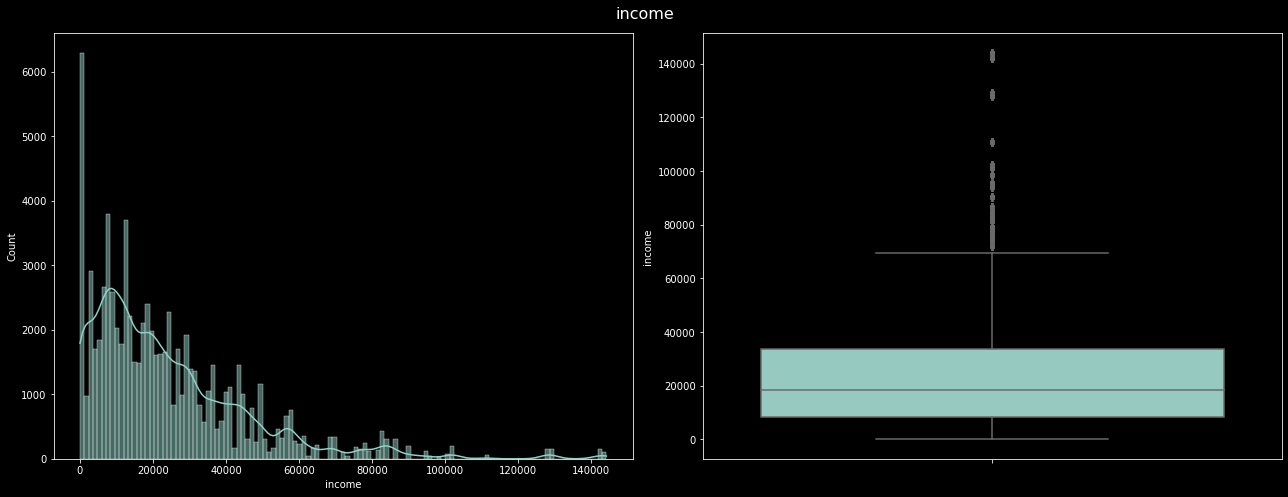

In [30]:
numeric_univariate(no_na_data["income"])

In [31]:
no_na_data["income"].describe()

count     77560.000000
mean      24072.116890
std       22200.093295
min           0.000000
25%        8201.000000
50%       18466.000000
75%       33706.000000
max      144157.000000
Name: income, dtype: float64

In [32]:
no_na_data.age.describe()

count    77560.000000
mean        44.207182
std         18.416369
min         13.000000
25%         30.000000
50%         44.000000
75%         57.000000
max         89.000000
Name: age, dtype: float64

#### Binning strategies

Age binning rationale:

13-18  Pre-labour market  
18-30  Entry/Junior  
30-45  Intermediate/Established  
45-60  Senior/Seasoned  
60+    Retirement   


Income binning based on [1995 US tax brackets](https://www.tax-brackets.org/federaltaxtable/1995)

In [33]:
income_bins = pd.IntervalIndex.from_tuples(
    [
        (0, 0.01),
        (0.01, 23350.00),
        (23350.00, 56550.00),
        (56550.00, 117950.00),
        (117950.00, 256500.00),
    ],
    closed="left",
)
age_bins = pd.IntervalIndex.from_tuples(
    [(13, 18), (18, 30), (30, 45), (45, 60), (60, 1000)], closed="left"
)
kids_bins = pd.IntervalIndex.from_tuples([(-1, 0), (0, 3), (3, 5)], closed="right")


no_na_data["nbr_children"] = pd.cut(
    no_na_data.nbr_children, kids_bins, labels=[0, 1, 2]
)
no_na_data["age"] = pd.cut(no_na_data["age"], age_bins, labels=[1, 2, 3, 4, 5])
no_na_data["income"] = pd.cut(no_na_data["income"], income_bins, labels=[0, 1, 2, 3, 4])

<AxesSubplot:ylabel='years_with_bank'>

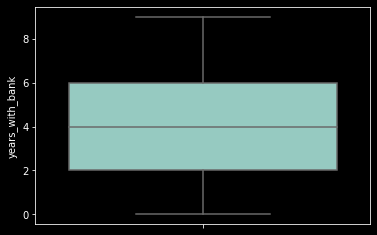

In [34]:
sns.boxplot(y=no_na_data.years_with_bank)

In [35]:
no_na_data.years_with_bank.describe()

count    77560.000000
mean         3.882078
std          2.648874
min          0.000000
25%          2.000000
50%          4.000000
75%          6.000000
max          9.000000
Name: years_with_bank, dtype: float64

Loyalty data shows a fairly even split, can be represented in quartiles

In [36]:
loyalty_bins = pd.qcut(no_na_data.years_with_bank, 4)

In [37]:
no_na_data.years_with_bank = loyalty_bins

When viewed alongside continuous income values, the 0, 1-3, and 4-5 bins from nbr_children seemingly fit well together.

In [38]:
kids_bins = pd.IntervalIndex.from_tuples([(-1, 0), (0, 3), (3, 5)], closed="right")
no_na_data.nbr_children = pd.cut(no_na_data.nbr_children, kids_bins, labels=[0, 1, 2])

In [39]:
no_na_data.head()

,tran_amt,principal_amt,interest_amt,new_balance,channel,tran_code,acct_type,account_active,starting_balance,ending_balance,income,age,years_with_bank,nbr_children,gender,marital_status,state_code,region,tran_week
0,0.00,0.00,0.00,3753.34,A,IQ,SV,Y,391.96,3864.77,"[56550.0, 117950.0)","[45, 60)","(4.0, 6.0]","(-1, 0]",F,1.0,CA,W,42
1,140.63,140.63,0.00,3859.95,B,DP,SV,Y,391.96,3864.77,"[56550.0, 117950.0)","[45, 60)","(4.0, 6.0]","(-1, 0]",F,1.0,CA,W,52
2,0.49,0.00,0.49,392.94,UNKNOWN,IN,SV,Y,391.96,3864.77,"[56550.0, 117950.0)","[45, 60)","(4.0, 6.0]","(-1, 0]",F,1.0,CA,W,9
3,-120.00,-120.00,0.00,2253.68,A,WD,SV,Y,391.96,3864.77,"[56550.0, 117950.0)","[45, 60)","(4.0, 6.0]","(-1, 0]",F,1.0,CA,W,23
4,-140.00,-140.00,0.00,3753.34,A,WD,SV,Y,391.96,3864.77,"[56550.0, 117950.0)","[45, 60)","(4.0, 6.0]","(-1, 0]",F,1.0,CA,W,42


#### Converting explicitly binned columns into ordinal columns using integer category codes

In [40]:
processed = no_na_data.copy()

In [41]:
processed.income = processed.income.cat.codes

In [42]:
processed.age = processed.age.cat.codes

In [43]:
processed.nbr_children = processed.nbr_children.cat.codes

In [44]:
processed.years_with_bank = processed.years_with_bank.cat.codes

In [45]:
processed.head()

,tran_amt,principal_amt,interest_amt,new_balance,channel,tran_code,acct_type,account_active,starting_balance,ending_balance,income,age,years_with_bank,nbr_children,gender,marital_status,state_code,region,tran_week
0,0.00,0.00,0.00,3753.34,A,IQ,SV,Y,391.96,3864.77,3,3,2,0,F,1.0,CA,W,42
1,140.63,140.63,0.00,3859.95,B,DP,SV,Y,391.96,3864.77,3,3,2,0,F,1.0,CA,W,52
2,0.49,0.00,0.49,392.94,UNKNOWN,IN,SV,Y,391.96,3864.77,3,3,2,0,F,1.0,CA,W,9
3,-120.00,-120.00,0.00,2253.68,A,WD,SV,Y,391.96,3864.77,3,3,2,0,F,1.0,CA,W,23
4,-140.00,-140.00,0.00,3753.34,A,WD,SV,Y,391.96,3864.77,3,3,2,0,F,1.0,CA,W,42


### 18 features and 77560 observations for computing Gower's distances

In [46]:
gower_input = processed.copy()

In [47]:
gower_input = gower_input.drop("state_code", axis=1)

In [48]:
# Save the processed csv file to use in Gower's distance computations.
# gower_input.to_csv('gower_input.csv', index=False)